# Monte Carlo Ferromagnet
<b>Prerequisites:</b> Statistical Physics (Phase Transitions)
\begin{equation}
    {\cal H} = -J \sum_{<i,j>} S^z_i S_j^z
\end{equation}

In [1]:
using PyPlot;
push!(LOAD_PATH,".")
using Lattices;

In [2]:
l=10;
beta=1.1;
J=1;
t=100000;

Members of Type
* name  , a string
* l , length in number of unit cells
* dim, dimension of lattice
* a, array containing the basis vectors by which positions are generated
* unit. array of positions inside a single unit
* N , number of total sites
* X, array of positions
* nnei, number of nearest neighbors
* neigh, Array of nearest neighbors [i][j], where i is site and j is 1:nnei

In [3]:
sq=MakeLattice("Square",l);
S=ones(Int8,sq.N);
dt=1/(sq.N);

In [4]:
function dE(i::Int)
    Eii=0;
    for j in 1:sq.nnei
        Eii+=S[sq.neigh[i,j]];
    end
    Eii*=-J*S[i];
    return Eii;
end
function E()
    Evar=0;
    for k in 1:sq.N
        Evar+=.5*dE(k);
    end
    return Evar;
end
function M()
    Mvar=0;
    for k in 1:sq.N
        Mvar+=S[k];
    end
    return Mvar;
end

M (generic function with 1 method)

We will be wanting to measure our magnetization and energy throughout, but only once the state has become thoroughly decorellated. 

The correlation time is measured by:
\begin{equation}
C(t) = \langle S(0) S(t)\rangle - \langle S(0) \rangle \langle S(t) \rangle
\end{equation}


In [5]:
nskip=1;
t=100;
nmeas=Int64(t/nskip);
Ma=Array{Int32}(nmeas); 
Ea=Array{Int32}(nmeas);
Correl=Array{Float64}(nmeas);

In [40]:
beta=.44

0.44

In [41]:
tm=1;
pygui(true)
S0=copy(S);
for ti in 1:t
    for j in 1:sq.N
        i = rand(1:sq.N);
        de=dE(i);
        if(de>0 || rand()<exp(2*beta*de) )
            S[i]=-S[i];
        end
    end
    if isapprox(mod(ti,nskip),0)
        Ma[tm]=M();
        Ma2[tm]=Ma[tm].^2;
        Correl[tm]=sum(S.*S0)/sq.N-sum(S)*sum(S0)/(sq.N^2);
        #println(sum(S.*S0)/sq.N,' ',sum(S)*sum(S0)/(sq.N^2))
        tm+=1;
        
        #pcolor(reshape(S,10,10),cmap="winter")
        #draw()
        #sleep(.5)
    end
end
Mave=mean(Ma/sq.N);
Mstd=std(Ma/sq.N);
Mave, Mstd

(-0.79,0.11646302573622394)

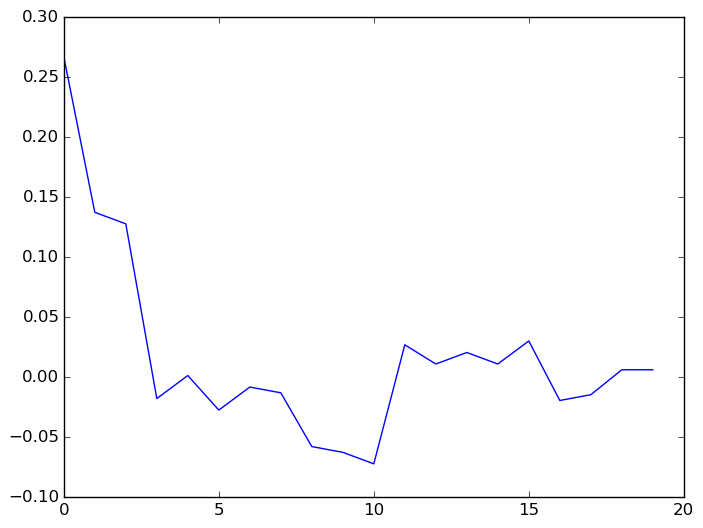

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3ee68b4dd0>

In [42]:
pygui(false)
plot(Correl[1:20])

In [ ]:
pygui(false)
plot(Ctest[1:50,1],linestyle=":")
plot(Ctest[1:50,2],linestyle=":")
plot(Ctest[1:50,3],linestyle=":")
plot(Ctest[1:50,4],linestyle=":")
plot(Ctest[1:50,5],linestyle=":")
plot(Cmean[1:50],color="black")

#annotate("Average of 5 runs",
#xy=[25;0],
#xytext=[28;-.2],
#xycoords="data",
#arrowprops=Dict("facecolor"=>"black"))

#annotate("Uncorrelated at t=6",
#xy=[6;-.02],
#xytext=[1;-.2],
#xycoords="data",
#arrowprops=Dict("facecolor"=>"black"))

title("Correlation time at beta=0.3")
ylabel("Autocorrelation")
xlabel("Time steps ti")

In [ ]:
pygui(true)
pcolor(reshape(S,10,10),cmap="winter")

In [ ]:
pygui(false)
plot(Ma)

In [ ]:
pygui(false)
plt[:hist](Ma);

In [ ]:
pygui(false)
plot(Correl[1:50])

## Example Results
So here are some example results I got.



In [19]:
sum(S0.*S)

86

In [20]:
sum(S0)

94

In [21]:
sum(S)

92